In [1]:
import os
import sys
sys.path.append('../scripts')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from convert_csv import analyse_rawfiles
from analyse_na import analyse_rawfiles_na
from half_life_estimation import fit_unlabelled, fit_sum_labelled, estimate_half_life, calc_half_life_table

## Example plot of 293

In [2]:
glob = "../data/labelling_experiments_cell_lines/293_?.?.csv"
df = analyse_rawfiles(glob)
df.head()

,Date,Passage,Cell line,Time in minutes,No label,Experiment,sum_labelled,no_label_percent,sum_labelled_percent,Exp
Time in hours,,,,,,,,,,
0.0,180807,0.0,293,0,3.263626e+05,293_2.2,0.000000,100.000000,0.000000,293_?.?
0.0,180807,0.0,293,0,1.167112e+06,293_2.3,2021.850142,99.827064,0.172936,293_?.?
0.0,180731,0.0,293,0,9.358266e+05,293_1.1,0.000000,100.000000,0.000000,293_?.?
0.0,180731,0.0,293,0,1.327864e+06,293_1.3,0.000000,100.000000,0.000000,293_?.?
0.0,180731,0.0,293,0,3.541006e+05,293_1.2,0.000000,100.000000,0.000000,293_?.?


In [3]:
hl = estimate_half_life(df, pretty_print=True, show_factors=True)
print('293: t(1/2)={}±{}'.format(hl[0], hl[1]))

293: t(1/2)=4h 22min±7min


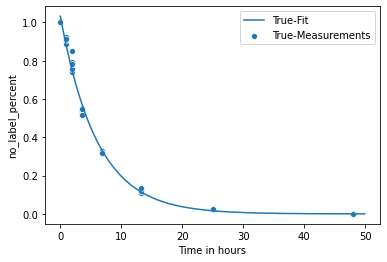

In [4]:
sol_unlab, cov_unlab = fit_unlabelled(df, plot_label=True)

## Cell-lines

### NAD Half-Life Times

In [5]:
glob_list = ['293_?.?',
             'CytoPARP_?.?',
             'ER_PARP_?.?',
             'mitoPARP_?.?',
             'pexPARP_?.?']
suffix = '.csv'
folder = 'labelling_experiments_cell_lines'
input_folder = os.path.join("..", "data", folder)
outfolder = '.'
outfile = os.path.join(outfolder, folder+suffix)
os.makedirs(outfolder, exist_ok=True)

Saving  labelling_experiments_cell_lines/293_?.?.pdf


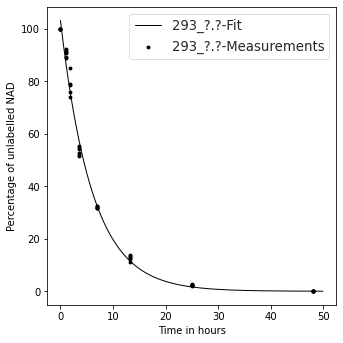

Saving  labelling_experiments_cell_lines/CytoPARP_?.?.pdf


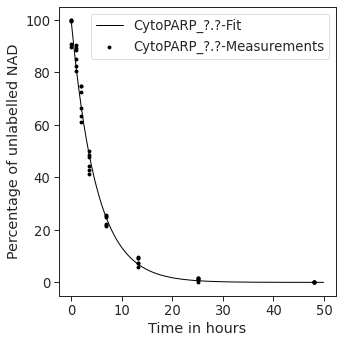

Saving  labelling_experiments_cell_lines/ER_PARP_?.?.pdf


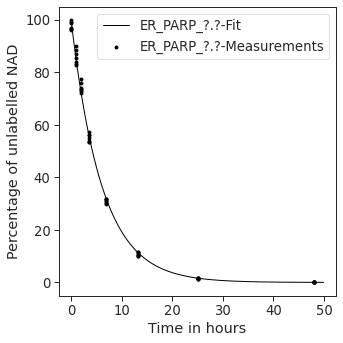

Saving  labelling_experiments_cell_lines/mitoPARP_?.?.pdf


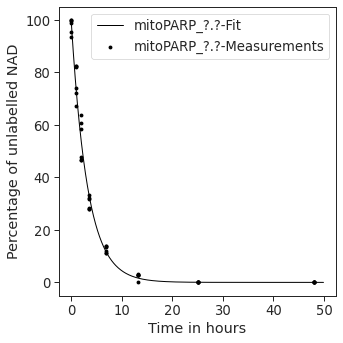

Saving  labelling_experiments_cell_lines/pexPARP_?.?.pdf


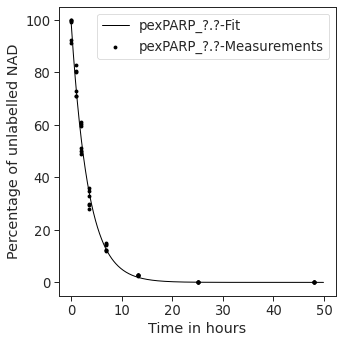

Saving ./labelling_experiments_cell_lines.csv


,half_life_time,standard_deviation,prefactor,std_prefactor,exp_prefactor,std_exp_factor,n_samples
293_?.?,4h 22min,7min,1.032071,0.009394,0.165796,0.003858,6.0
CytoPARP_?.?,3h 25min,8min,0.996330,0.013074,0.201566,0.006746,6.0
ER_PARP_?.?,4h 11min,4min,0.993854,0.005041,0.164274,0.002218,7.0
mitoPARP_?.?,2h 13min,5min,0.995140,0.014658,0.310932,0.010696,6.0
pexPARP_?.?,2h 17min,5min,0.985854,0.012485,0.297809,0.008881,6.0


In [6]:
calc_half_life_table(
    glob_list,
    show_factors=True,
    input_suffix=suffix,
    input_folder=input_folder,
    outputfile=outfile,
    plot_fit_graphs=True,
    graphs_outfolder=folder,
)

### ATP half-life times

In [7]:
glob_list = ["ER_PARP_?.?"]
suffix = ".csv"
folder = "labelling_experiments_cell_lines_ATP_erPARP"
input_folder = os.path.join("..", "data", folder)
outfolder = "."
outfile = os.path.join(outfolder, folder + suffix)

In [8]:
subsets = {"ATP": ["ATP:No label", "ATP:5C13"]}
dfs = []
for glob in glob_list:
    glob = glob + suffix
    glob = os.path.join(input_folder, glob)
    dfs.append(analyse_rawfiles_na(glob, subsets))
df = pd.concat(dfs)
df["sum_labelled_percent"] = df["ATP_labelled_percent"]

In [9]:
calc_half_life_table(
    df,
    show_factors=True,
    input_suffix=suffix,
    input_folder=input_folder,
    outputfile=outfile,
)

Saving ./labelling_experiments_cell_lines_ATP_erPARP.csv


,half_life_time,standard_deviation,prefactor,std_prefactor,exp_prefactor,std_exp_factor,n_samples
ER_PARP_?.?,3h 2min,7min,0.949838,0.013181,0.212008,0.007425,4.0


## Mitochondria Experiments

In [10]:
glob_list = ['Mitochondria_?',
             'WCL_?.?',
             'Mitochondria_1',
             'WCL_1.?',
             'Mitochondria_2',
             'WCL_2.?',
             'Mitochondria_3',
             'WCL_3.?',
             'Mitochondria_4',
             'WCL_4.?',
             ]

suffix = '.csv'
folder = 'labelling_experiments_mitochondria'
input_folder = os.path.join("..", "data", folder)
outfolder = '.'
outfile = os.path.join(outfolder, folder+suffix)

Saving  labelling_experiments_mitochondria/Mitochondria_1.pdf


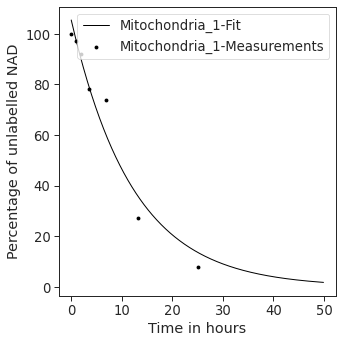

Saving  labelling_experiments_mitochondria/Mitochondria_2.pdf


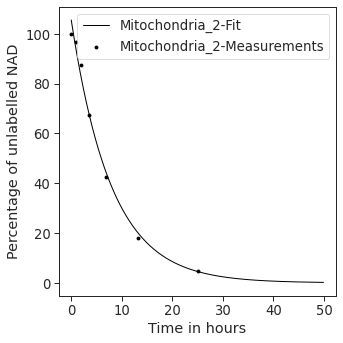

Saving  labelling_experiments_mitochondria/Mitochondria_3.pdf


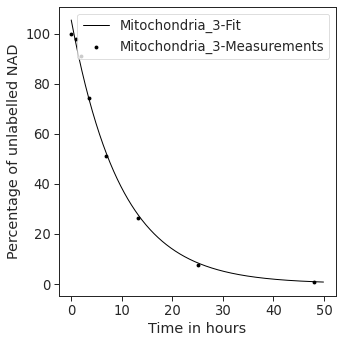

Saving  labelling_experiments_mitochondria/Mitochondria_4.pdf


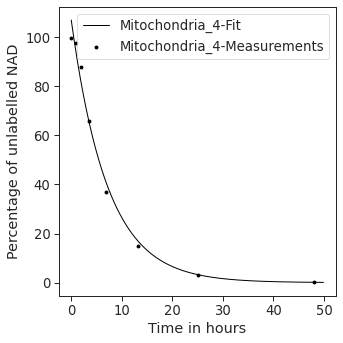

Saving  labelling_experiments_mitochondria/Mitochondria_?.pdf


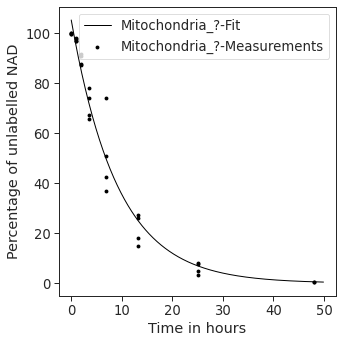

Saving  labelling_experiments_mitochondria/WCL_1.?.pdf


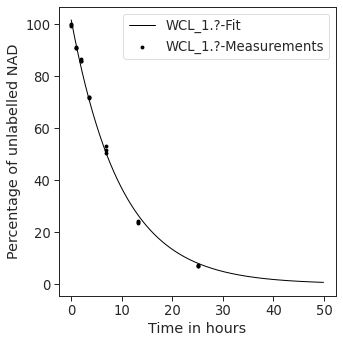

Saving  labelling_experiments_mitochondria/WCL_2.?.pdf


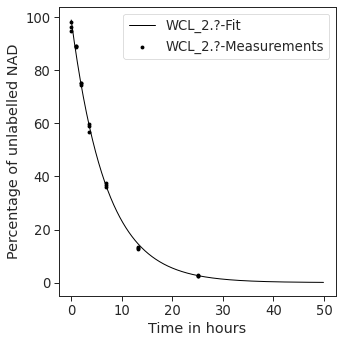

Saving  labelling_experiments_mitochondria/WCL_3.?.pdf


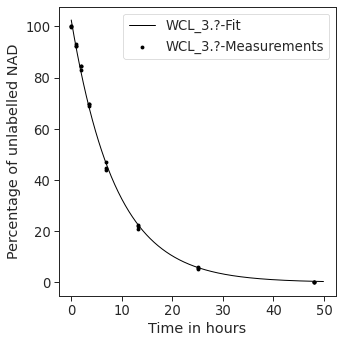

Saving  labelling_experiments_mitochondria/WCL_4.?.pdf


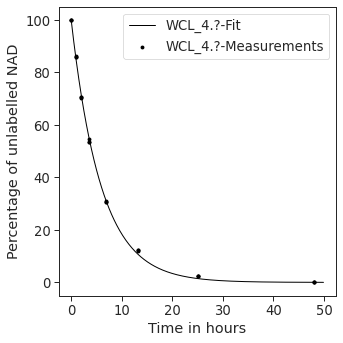

Saving  labelling_experiments_mitochondria/WCL_?.?.pdf


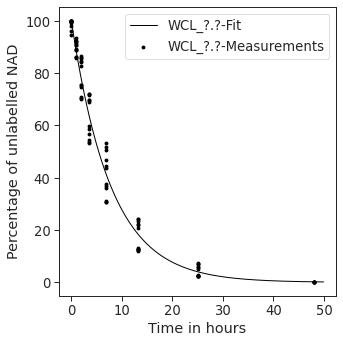

Saving ./labelling_experiments_mitochondria.csv


,half_life_time,standard_deviation,prefactor,std_prefactor,exp_prefactor,std_exp_factor,n_samples
Mitochondria_1,9h 8min,1h 33min,1.054493,0.053467,0.081755,0.012763,1.0
Mitochondria_2,5h 57min,28min,1.055762,0.026963,0.125718,0.009031,1.0
Mitochondria_3,7h 21min,29min,1.054423,0.021645,0.101458,0.006108,1.0
Mitochondria_4,5h 27min,31min,1.070137,0.033730,0.139615,0.012115,1.0
Mitochondria_?,6h 52min,30min,1.053853,0.023864,0.108602,0.007122,4.0
WCL_1.?,6h 59min,10min,1.016646,0.007669,0.101541,0.002250,3.0
WCL_2.?,4h 43min,8min,0.989654,0.008545,0.144770,0.003416,3.0
WCL_3.?,6h 16min,8min,1.024870,0.006527,0.114626,0.002091,3.0
WCL_4.?,4h 6min,4min,0.998527,0.005362,0.169025,0.002402,3.0
WCL_?.?,5h 26min,11min,1.003338,0.011101,0.128241,0.003974,12.0


In [11]:
calc_half_life_table(
    glob_list,
    show_factors=True,
    input_suffix=suffix,
    input_folder=input_folder,
    outputfile=outfile,
    plot_fit_graphs=True,
    graphs_outfolder=folder,
)

## BKA Experiments

### NAD Half-Life Times

In [12]:
experiments = ["BKA", "No_BKA"]
glob_list = []
for e in experiments:
    glob_list.append(e + "_mito_?")
    glob_list.append(e + "_WCL_?")

suffix = '.csv'
folder = 'labelling_experiments_BKA_NAD'
input_folder = os.path.join("..", "data", folder)
outfolder = '.'
outfile = os.path.join(outfolder, folder+suffix)

Saving  labelling_experiments_BKA_NAD/BKA_WCL_?.pdf


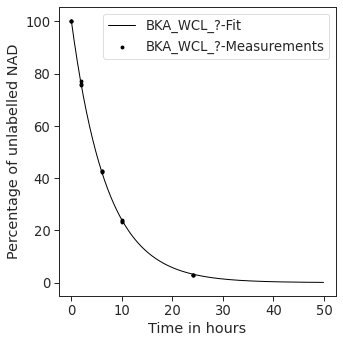

Saving  labelling_experiments_BKA_NAD/BKA_mito_?.pdf


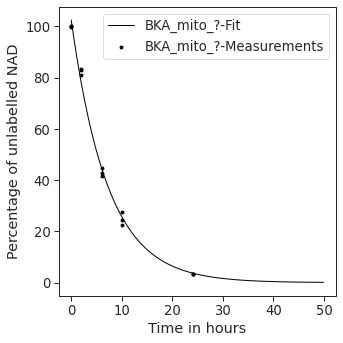

Saving  labelling_experiments_BKA_NAD/No_BKA_WCL_?.pdf


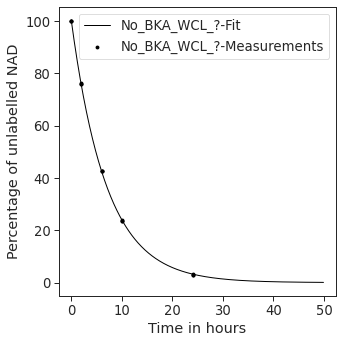

Saving  labelling_experiments_BKA_NAD/No_BKA_mito_?.pdf


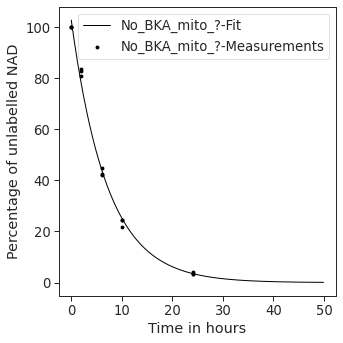

Saving ./labelling_experiments_BKA_NAD.csv


,half_life_time,standard_deviation,prefactor,std_prefactor,exp_prefactor,std_exp_factor,n_samples
BKA_WCL_?,4h 53min,3min,1.004929,0.003160,0.143028,0.001088,3
BKA_mito_?,5h 12min,13min,1.024909,0.015203,0.138207,0.004983,3
No_BKA_WCL_?,4h 52min,2min,1.003018,0.002121,0.142980,0.000732,3
No_BKA_mito_?,5h 8min,13min,1.026937,0.015265,0.140250,0.005057,3


In [13]:
calc_half_life_table(
    glob_list,
    show_factors=True,
    input_suffix=suffix,
    input_folder=input_folder,
    outputfile=outfile,
    plot_fit_graphs=True,
    graphs_outfolder=folder,
)

### ATP half-life times

In [14]:
folder = 'labelling_experiments_BKA_ATP'
input_folder = os.path.join("..", "data", folder)
outfolder = '.'
outfile = os.path.join(outfolder, folder+suffix)

subsets = {"ATP": ["ATP:No label", "ATP:5C13"]}
dfs = []
for glob in glob_list:
    glob = glob + suffix
    glob = os.path.join(input_folder, glob)
    dfs.append(analyse_rawfiles_na(glob, subsets))
df = pd.concat(dfs)
df["sum_labelled_percent"] = df["ATP_labelled_percent"]

In [15]:
calc_half_life_table(
    df,
    show_factors=True,
    input_suffix=suffix,
    input_folder=input_folder,
    outputfile=outfile,
)

Saving ./labelling_experiments_BKA_ATP.csv


,half_life_time,standard_deviation,prefactor,std_prefactor,exp_prefactor,std_exp_factor,n_samples
BKA_WCL_?,3h 25min,11min,0.780958,0.012340,0.130651,0.005060,3
BKA_mito_?,4h 15min,25min,0.899193,0.029709,0.137935,0.011080,3
No_BKA_WCL_?,3h 48min,11min,0.869801,0.014038,0.145665,0.005675,3
No_BKA_mito_?,4h 27min,26min,0.893764,0.028623,0.130542,0.010249,3


## 3AB Experiments

In [16]:
glob_list = ['293_+_3AB_?.?',
             '293_?.?',
             'CP_+_3AB_?.?',
             'CP_?.?',
             'ER_+_3AB_?.?',
             'ER_?.?',
             'MP_+_3AB_?.?',
             'MP_?.?',
             'PP_+_3AB_?.?',
             'PP_?.?',
            ]

suffix = '.csv'
folder = 'labelling_experiments_3AB_washout_stable_cell_lines'
input_folder = os.path.join("..", "data", folder)
outfile = os.path.join(outfolder, folder+suffix)

In [17]:
glob_list = ['293_+_3AB_?.?',
             '293_?.?',
             'CP_+_3AB_?.?',
             'CP_?.?',
             'ER_+_3AB_?.?',
             'ER_?.?',
             'MP_+_3AB_?.?',
             'MP_?.?',
             'PP_+_3AB_?.?',
             'PP_?.?',
            ]

suffix = '.csv'
folder = 'labelling_experiments_3AB_washout_stable_cell_lines'
input_folder = os.path.join("..", "data", folder)
outfile = os.path.join(outfolder, folder+suffix)
outfile_alt = os.path.join(outfolder, folder+"_alternative"+suffix)

Saving  labelling_experiments_3AB_washout_stable_cell_lines/293_+_3AB_?.?.pdf


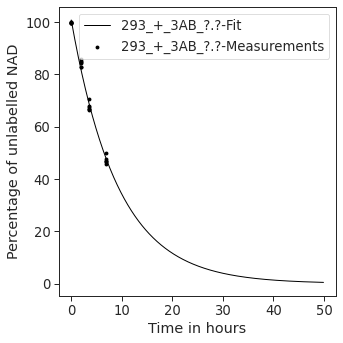

Saving  labelling_experiments_3AB_washout_stable_cell_lines/293_?.?.pdf


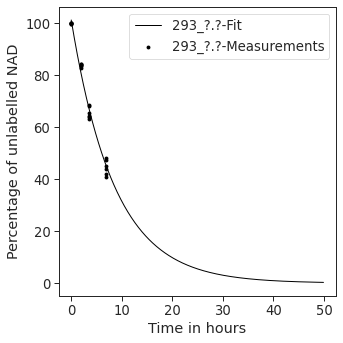

Saving  labelling_experiments_3AB_washout_stable_cell_lines/CP_+_3AB_?.?.pdf


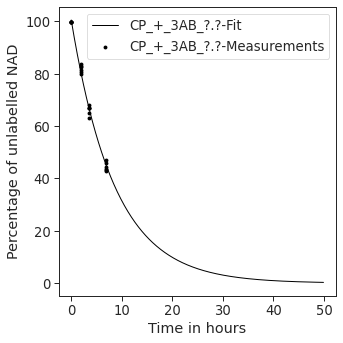

Saving  labelling_experiments_3AB_washout_stable_cell_lines/CP_?.?.pdf


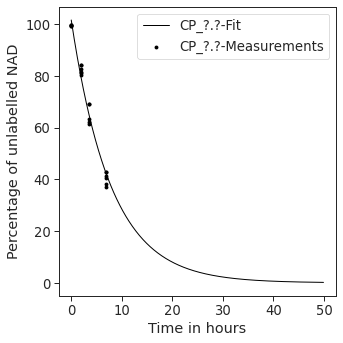

Saving  labelling_experiments_3AB_washout_stable_cell_lines/ER_+_3AB_?.?.pdf


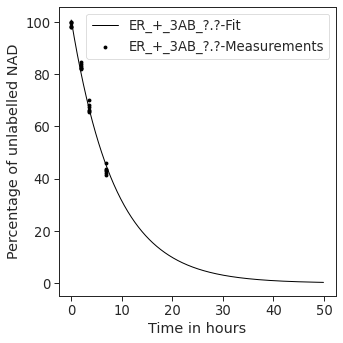

Saving  labelling_experiments_3AB_washout_stable_cell_lines/ER_?.?.pdf


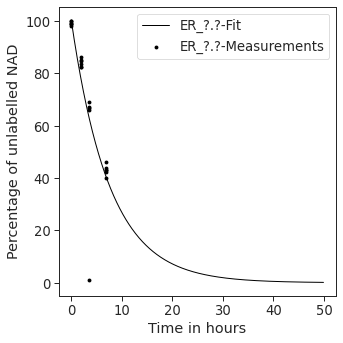

Saving  labelling_experiments_3AB_washout_stable_cell_lines/MP_+_3AB_?.?.pdf


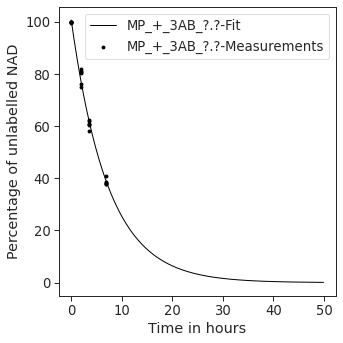

Saving  labelling_experiments_3AB_washout_stable_cell_lines/MP_?.?.pdf


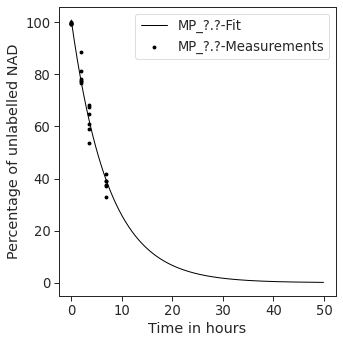

Saving  labelling_experiments_3AB_washout_stable_cell_lines/PP_+_3AB_?.?.pdf


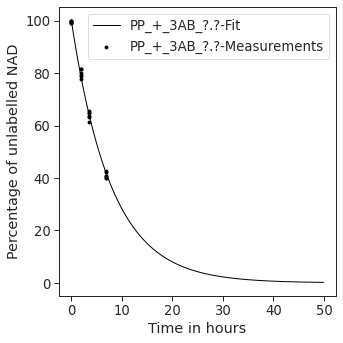

Saving  labelling_experiments_3AB_washout_stable_cell_lines/PP_?.?.pdf


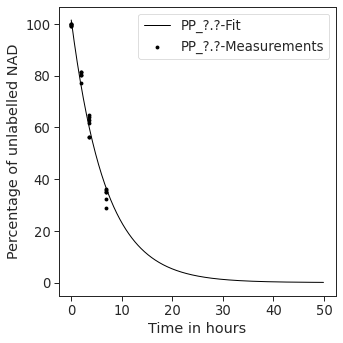

Saving ./labelling_experiments_3AB_washout_stable_cell_lines.csv


,half_life_time,standard_deviation,prefactor,std_prefactor,exp_prefactor,std_exp_factor,n_samples
293_+_3AB_?.?,6h 29min,9min,1.007553,0.006337,0.108054,0.002207,6.0
293_?.?,6h 2min,11min,1.010456,0.008836,0.116708,0.003159,6.0
CP_+_3AB_?.?,6h 1min,7min,1.005073,0.005647,0.116079,0.002025,6.0
CP_?.?,5h 35min,12min,1.016345,0.011605,0.127037,0.004152,5.5
ER_+_3AB_?.?,6h 1min,10min,1.006499,0.008172,0.116285,0.002929,6.0
ER_?.?,5h 18min,53min,1.003937,0.051354,0.131686,0.019696,6.0
MP_+_3AB_?.?,5h 5min,7min,1.005963,0.007103,0.137566,0.002736,6.0
MP_?.?,5h 10min,14min,1.008661,0.014750,0.136022,0.005636,6.0
PP_+_3AB_?.?,5h 30min,5min,1.002338,0.004964,0.126414,0.001848,6.0
PP_?.?,4h 47min,11min,1.014654,0.013174,0.147893,0.005155,6.0


In [18]:
calc_half_life_table(
    glob_list,
    show_factors=True,
    input_suffix=suffix,
    input_folder=input_folder,
    outputfile=outfile,
    plot_fit_graphs=True,
    graphs_outfolder=folder,
)

Saving  labelling_experiments_3AB_washout_stable_cell_lines/293_+_3AB_?.?.pdf


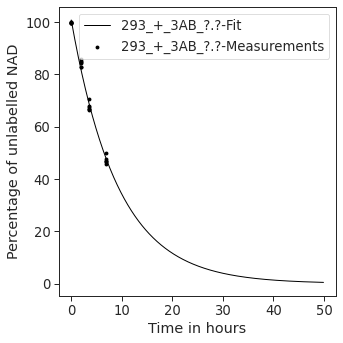

Saving  labelling_experiments_3AB_washout_stable_cell_lines/293_?.?.pdf


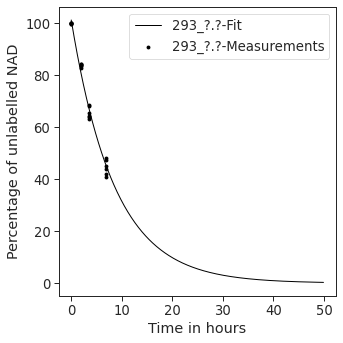

Saving  labelling_experiments_3AB_washout_stable_cell_lines/CP_+_3AB_?.?.pdf


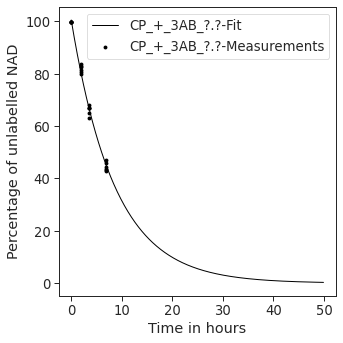

Saving  labelling_experiments_3AB_washout_stable_cell_lines/CP_?.?.pdf


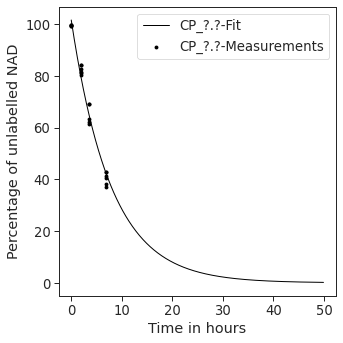

Saving  labelling_experiments_3AB_washout_stable_cell_lines/ER_+_3AB_?.?.pdf


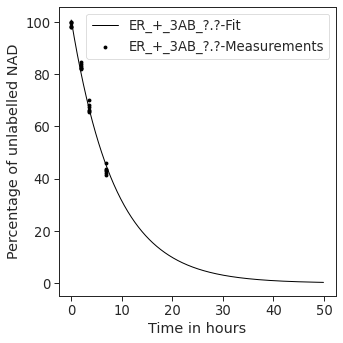

Saving  labelling_experiments_3AB_washout_stable_cell_lines/ER_?.?.pdf


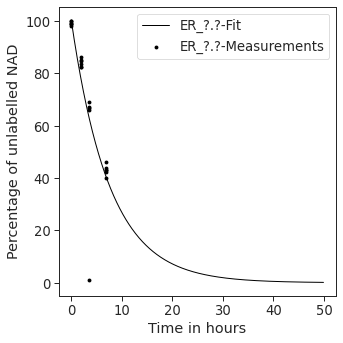

Saving  labelling_experiments_3AB_washout_stable_cell_lines/MP_+_3AB_?.?.pdf


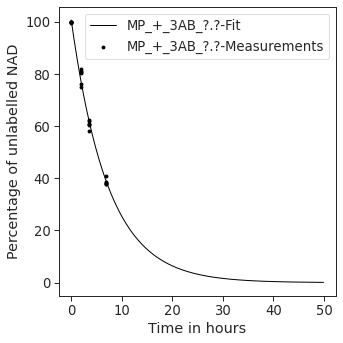

Saving  labelling_experiments_3AB_washout_stable_cell_lines/MP_?.?.pdf


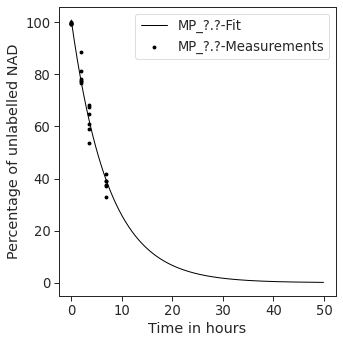

Saving  labelling_experiments_3AB_washout_stable_cell_lines/PP_+_3AB_?.?.pdf


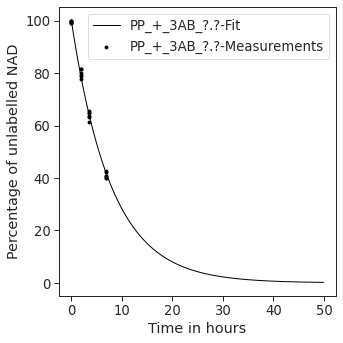

Saving  labelling_experiments_3AB_washout_stable_cell_lines/PP_?.?.pdf


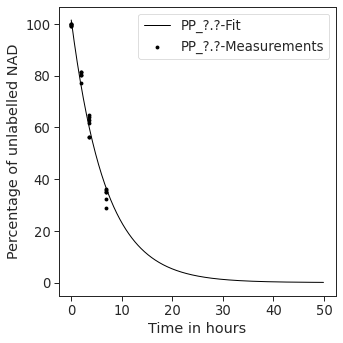

Saving ./labelling_experiments_3AB_washout_stable_cell_lines.csv


,half_life_time,standard_deviation,prefactor,std_prefactor,exp_prefactor,std_exp_factor,n_samples
293_+_3AB_?.?,6h 29min,9min,1.007553,0.006337,0.108054,0.002207,6.0
293_?.?,6h 2min,11min,1.010456,0.008836,0.116708,0.003159,6.0
CP_+_3AB_?.?,6h 1min,7min,1.005073,0.005647,0.116079,0.002025,6.0
CP_?.?,5h 35min,12min,1.016345,0.011605,0.127037,0.004152,5.5
ER_+_3AB_?.?,6h 1min,10min,1.006499,0.008172,0.116285,0.002929,6.0
ER_?.?,5h 18min,53min,1.003937,0.051354,0.131686,0.019696,6.0
MP_+_3AB_?.?,5h 5min,7min,1.005963,0.007103,0.137566,0.002736,6.0
MP_?.?,5h 10min,14min,1.008661,0.014750,0.136022,0.005636,6.0
PP_+_3AB_?.?,5h 30min,5min,1.002338,0.004964,0.126414,0.001848,6.0
PP_?.?,4h 47min,11min,1.014654,0.013174,0.147893,0.005155,6.0


In [19]:
calc_half_life_table(
    glob_list,
    show_factors=True,
    input_suffix=suffix,
    input_folder=input_folder,
    outputfile=outfile,
    plot_fit_graphs=True,
    graphs_outfolder=folder,
)

## Cell Lines - Mito-WCL Separation

In [20]:
cell_lines = [
    "293",
    "CP",
    "ER",
    "MP",
    "PP",
]
glob_list = []
for c in cell_lines:
    glob_list.append(c + "_mito_?")
    glob_list.append(c + "_WCL_?")
suffix = ".csv"
folder = "labelling_experiments_cell_lines_wcl_mito_separation_techrepl?"
input_folder = os.path.join("..", "data", folder)
outfolder = "."
plotfolder = "labelling_experiments_cell_lines_wcl_mito_separation"
outfile = os.path.join(outfolder, plotfolder + suffix)

Saving  labelling_experiments_cell_lines_wcl_mito_separation/293_WCL_?.pdf


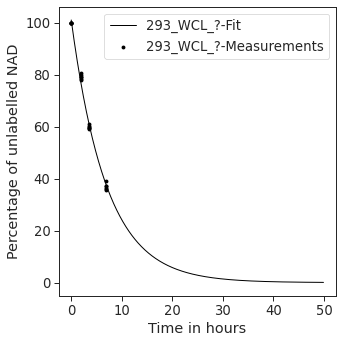

Saving  labelling_experiments_cell_lines_wcl_mito_separation/293_mito_?.pdf


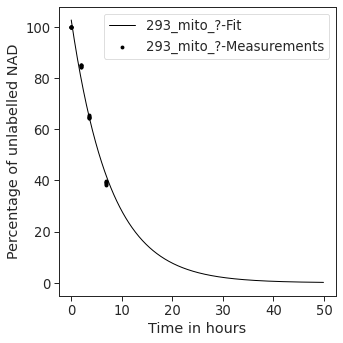

Saving  labelling_experiments_cell_lines_wcl_mito_separation/CP_WCL_?.pdf


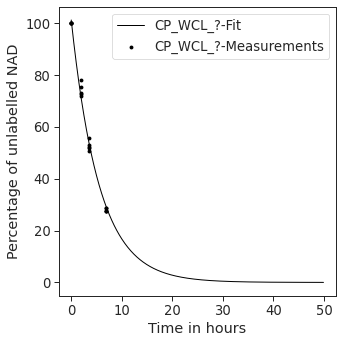

Saving  labelling_experiments_cell_lines_wcl_mito_separation/CP_mito_?.pdf


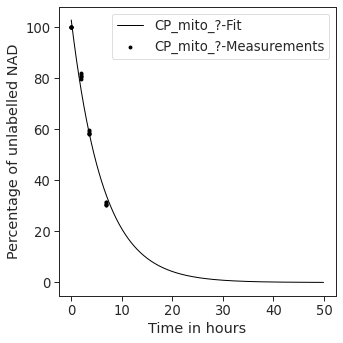

Saving  labelling_experiments_cell_lines_wcl_mito_separation/ER_WCL_?.pdf


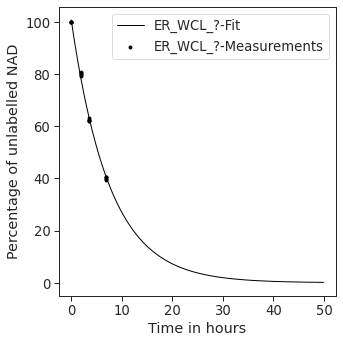

Saving  labelling_experiments_cell_lines_wcl_mito_separation/ER_mito_?.pdf


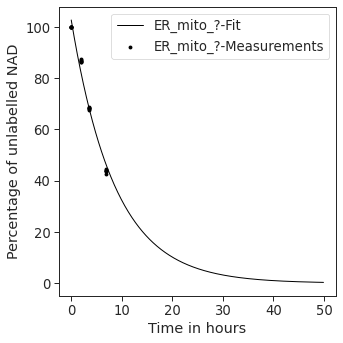

Saving  labelling_experiments_cell_lines_wcl_mito_separation/MP_WCL_?.pdf


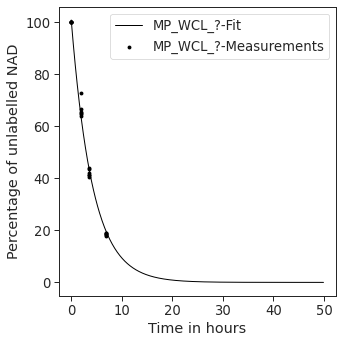

Saving  labelling_experiments_cell_lines_wcl_mito_separation/MP_mito_?.pdf


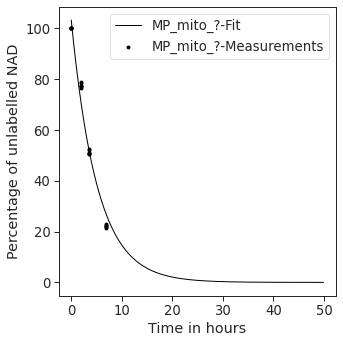

Saving  labelling_experiments_cell_lines_wcl_mito_separation/PP_WCL_?.pdf


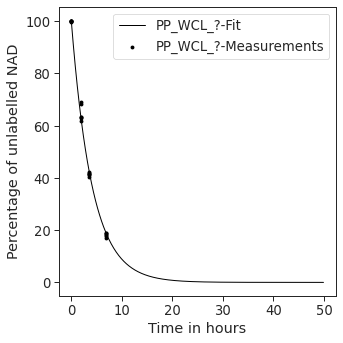

Saving  labelling_experiments_cell_lines_wcl_mito_separation/PP_mito_?.pdf


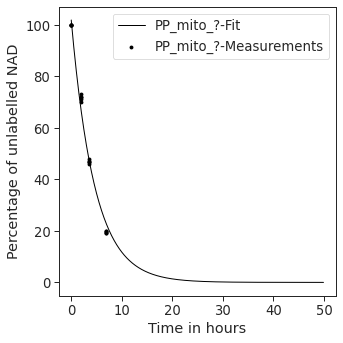

Saving ./labelling_experiments_cell_lines_wcl_mito_separation.csv


,half_life_time,standard_deviation,prefactor,std_prefactor,exp_prefactor,std_exp_factor,n_samples
293_WCL_?,4h 55min,5min,1.010275,0.005835,0.143029,0.002279,6.0
293_mito_?,5h 33min,12min,1.027096,0.011509,0.129714,0.004228,6.0
CP_WCL_?,3h 55min,6min,1.010936,0.008791,0.179737,0.003879,5.0
CP_mito_?,4h 32min,10min,1.027064,0.013039,0.158758,0.005281,6.0
ER_WCL_?,5h 20min,4min,1.007680,0.004214,0.131598,0.001588,5.0
ER_mito_?,6h 13min,13min,1.026468,0.010703,0.115566,0.003752,6.0
MP_WCL_?,2h 57min,4min,1.008606,0.008521,0.237309,0.004546,6.0
MP_mito_?,3h 43min,10min,1.031685,0.017083,0.194920,0.007766,6.0
PP_WCL_?,2h 53min,3min,1.004729,0.006749,0.242446,0.003673,6.0
PP_mito_?,3h 18min,7min,1.019402,0.012736,0.215990,0.006277,5.0


In [21]:
calc_half_life_table(
    glob_list,
    show_factors=True,
    input_suffix=suffix,
    input_folder=input_folder,
    outputfile=outfile,
    plot_fit_graphs=True,
    graphs_outfolder=plotfolder,
)

### Separate Cyto-Mito Half-Life Times

In [22]:
def amounts(amount_293, ratio):
    """Calculate cyto, cell and mito amounts from 293 amount and ratios."""
    amount_parp = {}
    amount_parp["cell"] = ratio["cell"] * amount_293["cell"]
    amount_parp["mito"] = ratio["mito"] * amount_293["mito"]
    amount_parp["cyto"] = amount_parp["cell"] - amount_parp["mito"]
    return amount_parp

nad_amount_293 = {"cyto": 3.3, "mito": 1.6}
nad_amount_293["cell"] = nad_amount_293["cyto"] + nad_amount_293["mito"]
nad_ratio_pp = {"cell": 0.527, "mito": 0.282}
nad_ratio_mp = {"cell": 0.567, "mito": 0.197}

nad_amount_pp = amounts(nad_amount_293, nad_ratio_pp)
nad_amount_mp = amounts(nad_amount_293, nad_ratio_mp)

cyto_mito_dict = {
    "293": ["293_WCL_?", "293_mito_?", nad_amount_293["cyto"], nad_amount_293["mito"]],
    "pexPARP": ["PP_WCL_?", "PP_mito_?", nad_amount_pp["cyto"], nad_amount_pp["mito"]],
    "mitoPARP": ["MP_WCL_?", "MP_mito_?", nad_amount_mp["cyto"], nad_amount_mp["mito"]],
}
outfile = os.path.join(outfolder, plotfolder + "_split_approach" + suffix)

In [23]:
calc_half_life_table(
    glob_list,
    cyto_mito=cyto_mito_dict,
    show_factors=True,
    input_suffix=suffix,
    input_folder=input_folder,
    outputfile=outfile,
)

Saving ./labelling_experiments_cell_lines_wcl_mito_separation_split_approach.csv


,half_life_time_cyto,half_life_time_mito,exp_prefactor_cyto,exp_prefactor_mito,prefactor_cyto,prefactor_mito,std_exp_factor_cyto,std_exp_factor_mito,std_prefactor_cyto,std_prefactor_mito,cell_gradient_at_0h,cyto_gradient_at_0h,mito_gradient_at_0h,std_cell_gradient_at_0h,std_cyto_gradient_at_0h,std_mito_gradient_at_0h,nad_amount_cyto,nad_amount_mito
293,4h 38min,5h 33min,0.149871,0.129714,1.002046,1.027096,0.003528,0.004228,0.008757,0.011509,0.708752,0.495586,0.213166,0.695896,0.304069,0.625950,3.3000,1.6000
pexPARP,2h 48min,3h 18min,0.248476,0.215990,1.001634,1.019402,0.004580,0.006277,0.008232,0.012736,0.629737,0.530392,0.099346,2.265753,0.469675,2.216538,2.1311,0.4512
mitoPARP,2h 52min,3h 43min,0.243375,0.194920,1.005678,1.031685,0.005292,0.007766,0.009704,0.017083,0.666247,0.602861,0.063386,3.198840,0.406689,3.172882,2.4631,0.3152


## AtNDT2 Mito-WCL Separation

### NAD Half-Life Times

In [24]:
cell_lines = ["293", "AtNDT2"]
glob_list = []
for c in cell_lines:
    glob_list.append(c + "_wcl_?")
    glob_list.append(c + "_mito_?")
suffix = ".csv"
folder = "labelling_experiments_AtNDT2"
input_folder = os.path.join("..", "data", folder)
outfolder = "."
outfile_w_outlier = os.path.join(outfolder, folder + "_w_outlier" + suffix)

In [25]:
dfs = []
for glob in glob_list:
    glob = glob + suffix
    glob = os.path.join(input_folder, glob)
    dfs.append(analyse_rawfiles(glob))
df = pd.concat(dfs)

Saving  labelling_experiments_AtNDT2/293_mito_?.pdf


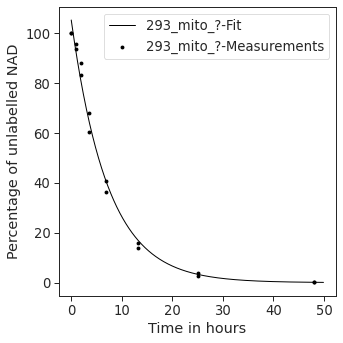

Saving  labelling_experiments_AtNDT2/293_wcl_?.pdf


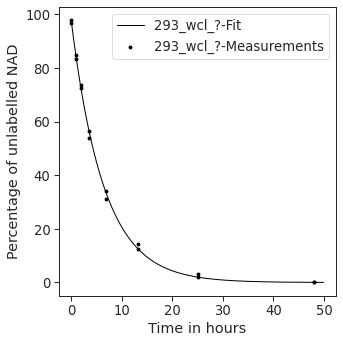

Saving  labelling_experiments_AtNDT2/AtNDT2_mito_?.pdf


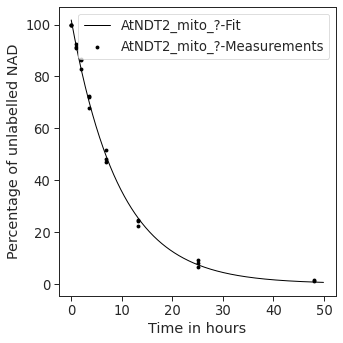

Saving  labelling_experiments_AtNDT2/AtNDT2_wcl_?.pdf


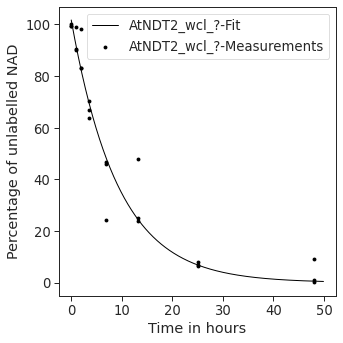

Saving ./labelling_experiments_AtNDT2_w_outlier.csv


,half_life_time,standard_deviation,prefactor,std_prefactor,exp_prefactor,std_exp_factor,n_samples
293_mito_?,5h 23min,18min,1.050912,0.019001,0.138064,0.006888,2.0
293_wcl_?,4h 18min,5min,0.976678,0.005928,0.155455,0.002541,2.0
AtNDT2_mito_?,6h 46min,10min,1.017800,0.007638,0.104991,0.002297,3.0
AtNDT2_wcl_?,6h 35min,42min,1.017311,0.033733,0.107844,0.010364,3.0


In [26]:
calc_half_life_table(
    df,
    show_factors=True,
    input_suffix=suffix,
    input_folder=input_folder,
    outputfile=outfile_w_outlier,
    plot_fit_graphs=True,
    graphs_outfolder=folder,
)

### ATP half-life times

In [27]:
cell_lines = ["293", "AtNDT2"]
glob_list = []
for c in cell_lines:
    glob_list.append(c + "_wcl_?")
    glob_list.append(c + "_mito_?")
suffix = ".csv"
folder = "labelling_experiments_AtNDT2_ATP"
input_folder = os.path.join("..", "data", folder)
outfolder = "."
outfile = os.path.join(outfolder, folder + suffix)

In [28]:
subsets = {"ATP": ["ATP:No label", "ATP:5C13"]}
dfs = []
for glob in glob_list:
    glob = glob + suffix
    glob = os.path.join(input_folder, glob)
    dfs.append(analyse_rawfiles_na(glob, subsets))
df = pd.concat(dfs)
df["sum_labelled_percent"] = df["ATP_labelled_percent"]

In [29]:
calc_half_life_table(
    df,
    show_factors=True,
    input_suffix=suffix,
    input_folder=input_folder,
    outputfile=outfile,
)

Saving ./labelling_experiments_AtNDT2_ATP.csv


,half_life_time,standard_deviation,prefactor,std_prefactor,exp_prefactor,std_exp_factor,n_samples
293_mito_?,4h 33min,32min,0.900618,0.031815,0.129282,0.012770,2.0
293_wcl_?,3h 7min,19min,0.937783,0.031121,0.201373,0.017049,2.0
AtNDT2_mito_?,7h 56min,1h 11min,0.746463,0.026629,0.050553,0.006014,2.0
AtNDT2_wcl_?,4h 12min,1h 30min,0.886116,0.096567,0.136116,0.041048,2.0


293_mito_?
293_wcl_?
AtNDT2_mito_?
AtNDT2_wcl_?


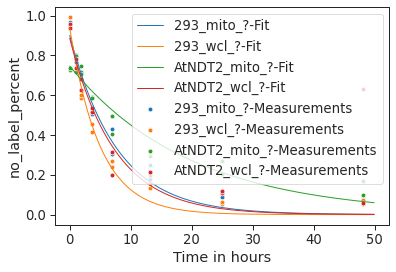

In [30]:
df["no_label_percent"] = df["ATP_unlabelled_percent"]
for name, data in df.groupby("Exp"):
    print(name)
    sol_unlab, cov_unlab = fit_unlabelled(data, plot_label=name)